# Linear Regression Assignment

In [2]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe

In [3]:
df = pd.read_csv('train_processed_splitted.csv')

Let's see what the first 5 rows of this dataset looks like

In [4]:
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [5]:
df.describe()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,10622.104262,1058.311263,1512.900304,473.480213,2.643075,5.582192,180795.504566
std,10430.181058,435.717809,524.854432,213.960987,39.504255,1.112699,77511.272784
min,1300.000000,0.000000,334.000000,0.000000,0.000000,1.000000,34900.000000
25%,7588.500000,796.000000,1124.250000,336.000000,0.000000,5.000000,130000.000000
50%,9501.500000,992.000000,1461.500000,480.000000,0.000000,5.000000,163250.000000
75%,11613.500000,1295.250000,1775.750000,576.000000,0.000000,6.000000,215000.000000
max,215245.000000,6110.000000,5642.000000,1418.000000,738.000000,9.000000,755000.000000


### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [6]:
# Do the one-hot encoding here
df = pd.get_dummies(df, columns=['Utilities']).astype(float)
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_AllPub,Utilities_NoSeWa
0,11553.0,1051.0,1159.0,336.0,0.0,5.0,158000.0,1.0,0.0
1,8400.0,1052.0,1052.0,288.0,0.0,5.0,138500.0,1.0,0.0
2,8960.0,1008.0,1028.0,360.0,0.0,6.0,115000.0,1.0,0.0
3,11100.0,0.0,930.0,308.0,0.0,7.0,84900.0,1.0,0.0
4,15593.0,1304.0,2287.0,667.0,0.0,4.0,225000.0,1.0,0.0


In [7]:
# Do the feature scaling here

# The output here is 'SalePrice'. Since the scale of the output is too large, we will scale is down to [0, 1].
# When we train our linear regression model, it will learn to predict outputs in this same range ([0, 1]).
# But what we need is the actual prediction of the SalePrice. Which is why we will scale our prediction back up to the original scale


# Store the min/max values to be used at test time
df_min = df.min()
df_max = df.max()

# Scale the features
df = (df - df_min) / (df_max - df_min)

df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_AllPub,Utilities_NoSeWa
0,0.047924,0.172013,0.155426,0.236953,0.0,0.500,0.170948,1.0,0.0
1,0.033186,0.172177,0.135268,0.203103,0.0,0.500,0.143869,1.0,0.0
2,0.035804,0.164975,0.130746,0.253879,0.0,0.625,0.111235,1.0,0.0
3,0.045806,0.000000,0.112283,0.217207,0.0,0.750,0.069435,1.0,0.0
4,0.066807,0.213421,0.367935,0.470381,0.0,0.375,0.263991,1.0,0.0


### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $(X, Y)$. These represent the features and targets respectively

In [8]:
# Convert to numpy array

x = df.copy().drop('SalePrice', axis=1).to_numpy() # (N, D)
y = df.copy()['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)

## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the case of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

**Answers**

1. We will have to learn a total of **9** parameters in the case of our dataset.  
We have **8** features (After One-Hot encoding, `Utitiles` is counted as 2 features. `SalePrice` is not a feature but a target) and **1** bias term  

2. For linear formulation, if we have `N` datapoints, each having `D` features, we have a total of `N` linear equations.

$$y_1 = w_1x_1^{(1)} + w_2x_{(2)}^1 \ldots w_Dx_D^{(1)} + b$$
$$y_2 = w_1x_1^{(2)} + w_2x_2^{(2)} \ldots w_Dx_D^{(2)} + b$$
$$\vdots$$
$$y_N = w_1x_1^{(N)} + w_2x_2^{(N)} \ldots w_Dx_D^{(N)} + b$$

We can represent this in matrix form as follows:

$$\begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_N\end{bmatrix} = \begin{bmatrix}x_1^{(1)} & x_2^{(1)} & \ldots & x_D^{(1)} \\ x_1^{(2)} & x_2^{(2)} & \ldots & x_D^{(2)} \\ \vdots & \vdots & \ddots & \vdots \\ x_1^{(N)} & x_2^{(N)} & \ldots & x_D^{(N)} \end{bmatrix} \begin{bmatrix}w_1 \\ w_2 \\ \vdots \\ w_D \end{bmatrix} + \begin{bmatrix} b \\ b \\ \vdots \\ b \end{bmatrix}$$

So, if we can represent our dataset(only features) as a matrix $X$ of shape $(N, D)$, our targets as a matrix $Y$ of shape $(N, 1)$ and our weights as a matrix $W$ of shape $(1, D)$, we have our linear equation as: 

$$Y = XW^T + B$$

3. Implementation of our above formulation using random weights (and bias) in NumPy

In [9]:
# Let's set a seed so that we can reproduce our results
np.random.seed(42)

w = np.random.randn(1, x.shape[1]) # (1, 8)
b = np.random.randn(1, 1) # (1, 1)

# x.shape = (1460, 8)
# y.shape = (1460, 1)

y_pred = x @ w.T + b # (1460, 1)

How well does our model perform? Try comparing our predictions with the actual values

In [10]:
# Recall that during our preprocessing step, we scaled the outputs to be in the range [0, 1].
# We need to scale our predictions back to the original scale so that we can compare it with the actual SalePrice

y_pred = y_pred * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']
y_true = y * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']

# For the sake of simplicity, we will take 5 random samples from the dataset, round them to the nearest integer and compare their values

idx = np.random.randint(0, x.shape[0], 5)
y_pred_sample = y_pred[idx].round().astype(int)
y_true_sample = y_true[idx].round().astype(int)

print('Predicted SalePrice: \t', y_pred_sample.squeeze().tolist())
print('Actual SalePrice: \t', y_true_sample.squeeze().tolist())


Predicted SalePrice: 	 [1193685, 1074239, 1328713, 1209386, 1158724]
Actual SalePrice: 	 [159950, 177000, 240000, 129500, 179540]


As we can see, our model performs really horribly. The values are way off. We need to improve our model. We will do this in the next section

### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

The `MSE Loss` is defined as $\mathscr{L} = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)})^2$

In [11]:
def mse_loss_fn(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred)**2)

Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

Gradients of the Loss function with respect to the weights (and biases) are given by:

$$\nabla_W \mathscr{L} = \frac{1}{N} (XW^T + B - Y)^TX$$
$$\nabla_B \mathscr{L} = \frac{1}{N} \sum_{i=1}^{N} (XW^T + B - Y)$$  

This can also be written as:

$$\nabla_W \mathscr{L} = \frac{1}{N} (\hat{Y} - Y)^TX$$
$$\nabla_B \mathscr{L} = \frac{1}{N} \sum_{i=1}^{N} (\hat{Y} - Y)$$  

where $\hat{Y} = XW^T + B$

How did we get this? Notice how the equations are matrices. We use something called `Jacobians` to calculate the gradients. You can read more about it in the resources section:
- [Matrix Calculus](https://explained.ai/matrix-calculus/index.html)
- [Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)


If you don't want to use `Jacobians`,
- Calculate the gradients of the loss function with respect to each weight (and bias) individually. You have done this in class
- You will get a multiple equations. Combine them in the form of matrices
- Make sure that the dimension of the gradients is the same as that of the weights


In [20]:
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to the weights (and bias)

    Args:
        y_true: The true values of the target variable (SalePrice in our case)
        y_pred: The predicted values of the target variable using our model (W*X + b)

        W: The weights of the model
        b: The bias of the model
        X: The input features

    Returns:
        dW: The gradients of the loss function with respect to the weights
        db: The gradients of the loss function with respect to the bias
    """
    
    dw = (y_pred - y_true).T @ X / X.shape[0]
    db = np.mean(y_pred - y_true)

    return dw, db

Update the weights using the gradients

In [21]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate

    Args:
        weights: The current weights of the model
        bias: The current bias of the model

        gradients_weights: The gradients of the loss function with respect to the weights
        gradients_bias: The gradients of the loss function with respect to the bias

        lr: The learning rate

    Returns:
        weights_new: The updated weights of the model
        bias_new: The updated bias of the model
    """

    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr * gradients_bias

    return weights_new, bias_new

Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [22]:
NUM_EPOCHS = 1_000
LEARNING_RATE = 0.1

losses = []

for epoch in range(NUM_EPOCHS):
    y_pred = x @ w.T + b
    loss = mse_loss_fn(y, y_pred)
    losses.append(loss)
    dw, db = get_gradients(y, y_pred, w, b, x)
    w, b = update(w, b, dw, db, LEARNING_RATE)

In [23]:
y_pred = x @ w.T + b
y_pred_scaled = y_pred * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']
y_true_scaled = y * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']


In [24]:
print('Predicted SalePrice: \t', y_pred_scaled[idx].round().astype(int).squeeze().tolist())
print('Actual SalePrice: \t', y_true_scaled[idx].round().astype(int).squeeze().tolist())
print('\nFinal loss: \t\t', losses[-1])

Predicted SalePrice: 	 [167831, 159075, 228728, 201759, 169889]
Actual SalePrice: 	 [159950, 177000, 240000, 129500, 179540]

Final loss: 		 0.0029198333119779805


Much better! Our model is able to learn specific patterns in the data. These patterns are captured by the weights (and biases)

Now use matplotlib to plot the loss graph

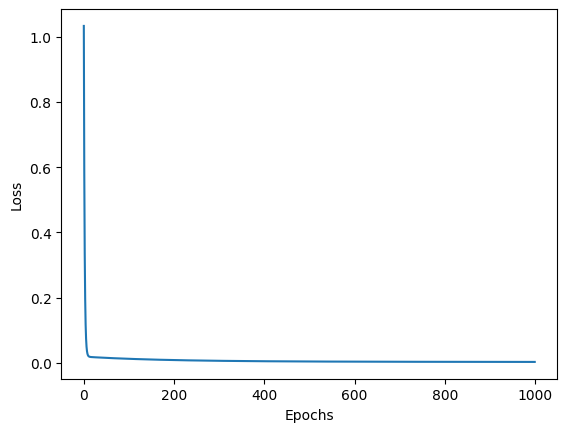

In [25]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

**Answer**
- We are using the same min/max values for the test set as we used for the training set because we want to normalize the test set in the same way as we normalized the training set.
- This is because we want to test our model on the same distribution as the training set.
- If we use different min/max values, we will be testing our model on a different distribution than the training set and our model will not perform well on the test set
- Let's also think about a scenario where we have just a single datapoint in our test set. What will happen if we calculate the min/max values from this single datapoint?
- We will get a divide by zero error. This is because the min/max values will be the same and so the denominator will be zero

In [26]:
# This test case is a special one. Notice that here Utilities_AllPub has 0 standard deviation.
# This means that the value of this feature is the same for all the samples in the dataset.
# This should not be an issue for our model at test time, but pd.get_dummies() will create only one column for this feature.
# This will cause an issue at test time since the number of features in the test set will be different from the number of features in the training set.
# To go around this issue, we will manually add a column (Utilities_NoSeWa) with all zeros for this feature in the test set.

df_test = pd.read_csv('test_processed_splitted.csv')
df_test = pd.get_dummies(df_test, columns=['Utilities']).astype(float)

# Let's find all the columns that are missing in the test set
missing_cols = set(df.columns) - set(df_test.columns)

# Add these columns to the test set with all zeros
for col in missing_cols:
    df_test[col] = 0

df_test.describe()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_AllPub,Utilities_NoSeWa
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.0
mean,9569.342466,1049.493151,1538.534247,468.479452,3.801370,5.513699,182052.417808,1.0,0.0
std,4041.729289,466.234413,532.345664,213.073412,45.932127,1.115634,95383.188980,0.0,0.0
min,1680.000000,0.000000,747.000000,0.000000,0.000000,2.000000,60000.000000,1.0,0.0
25%,7308.750000,793.250000,1201.000000,305.750000,0.000000,5.000000,126250.000000,1.0,0.0
50%,9245.500000,985.000000,1493.000000,471.000000,0.000000,5.000000,161000.000000,1.0,0.0
75%,11463.250000,1361.750000,1792.000000,576.000000,0.000000,6.000000,202623.750000,1.0,0.0
max,35760.000000,3094.000000,4476.000000,1043.000000,555.000000,9.000000,745000.000000,1.0,0.0


In [27]:
# Let's proceed with the rest of the preprocessing steps

# Scale the features
df_test = (df_test - df_min) / (df_max - df_min)

# Convert to numpy array
x_test = df_test.copy().drop('SalePrice', axis=1).to_numpy() # (N, D)
y_test = df_test.copy()['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)

Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [28]:
# Make predictions
y_pred_test = x_test @ w.T + b # (N, 1)
loss_test = mse_loss_fn(y_pred_test, y_test)

# Scale the predictions back to the original scale
y_pred_test_scaled = y_pred_test * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']
y_test_scaled = y_test * (df_max['SalePrice'] - df_min['SalePrice']) + df_min['SalePrice']

In [29]:
# Again for the sake of simplicity, let's take 5 random samples, round them to the nearest integer and compare their values

idx = np.random.randint(0, x_test.shape[0], 5)
y_pred_test_sample = y_pred_test_scaled[idx].round().astype(int)
y_true_test_sample = y_test_scaled[idx].round().astype(int)

print('Predicted SalePrice: \t', y_pred_test_sample.squeeze().tolist())
print('Actual SalePrice: \t', y_true_test_sample.squeeze().tolist())
print('\nTest Loss: \t\t', loss_test)

Predicted SalePrice: 	 [122276, 201379, 83920, 148472, 301182]
Actual SalePrice: 	 [121600, 196500, 85000, 170000, 410000]

Test Loss: 		 0.005137542886225422


**Answers**
- The predictions are way better than those random predictions we made earlier, but they can be made better. Feel free to play around with some parameters such as learning rate and epochs to see what happens.  
Also try the same without feature scaling and one-hot encoding to see what happens
- The MSE loss for the test set is greater than the training set.  
- - This is because the model has been trained specifically to get predictions **ONLY** for the training set. It has not seen the test set before and so it is not able to generalize as well for the test set as it did for the training set.
  - Still, the performance is pretty good. What it has learnt for the training set is pretty much the same as what it has learnt for the test set.
  - Notice that the distribution of the test set is pretty much the same as the training set. If the distribution of the test set was different, the performance would have been much worse.
  - This condition for the model to generalize well is called `i.i.d` or `Independent and Identically Distributed`. You would have learnt about this in your Probability and Statistics course. For those who are not familiar with this, you can read more about it [here](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)